In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
training_data = pd.read_csv('D:\MTECH\Sem-1\Foundations of ML\dataset1.txt',header=None, sep=' ')
training_data.head()

,0,1
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782


In [48]:
pts = training_data.values
X = training_data[0]
Y = training_data[1]

In [49]:
len(training_data)

500

# (a)  K-means clustering algorithm 

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(pts)

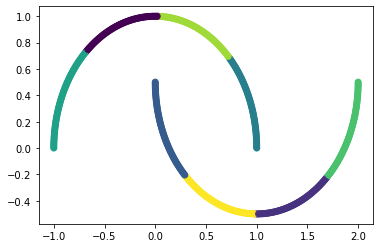

In [51]:
plt.scatter(X,Y,c=kmeans.labels_.astype(float))

# (b) DBSCAN Algorithm

In [52]:
def neighbour_points(data, epsilon, pointID):
    points=[]
    for i in range(data.shape[0]):
        distance = np.linalg.norm(pointID-data[i])
        if distance<=epsilon and distance>0:
            points.append(i)
    return points

In [53]:
def Cluster(temp, is_visited, MinPts, epsilon, count, cluster, visited_index, data):
    is_visited[visited_index] = 1 
    if cluster[visited_index] == -1:
        if len(temp)>=MinPts:
            cluster[visited_index]= count 
            for i in temp:
                pointID = data[i]
                neighbourhood= neighbour_points(data,epsilon,pointID)
                if is_visited[i]==0:
                    Cluster(neighbourhood, is_visited,MinPts,epsilon,count,cluster,i,data)
        elif len(temp)<MinPts:
            cluster[visited_index]= 0 

In [54]:
def DBScan(data,epsilon,MinPts):
    is_visited=[0]*(pts.shape[0])
    cluster=[-1]*(pts.shape[0])
    count=0
    while 0 in is_visited:
        print("Clusters : ")
        if count in cluster or count==0 :
            count+=1
        visited_index = is_visited.index(0)
        print("Visited Node is : ",visited_index)
        pointID = data[visited_index]
        temp = neighbour_points(data,epsilon,pointID)
        print("Number of points in the Neighbourhood are : ",len(temp))
        Cluster(temp, is_visited,MinPts,epsilon,count,cluster,visited_index,data)    
    return cluster

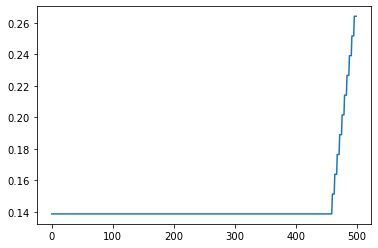

In [55]:
# Elbow Method 
y_distance=[]
for i in range(pts.shape[0]):
    cal_distance=[]
    pointID = pts[i]
    for j in range(pts.shape[0]):
        dist = np.linalg.norm(pointID-pts[j])
        if dist>0:
            cal_distance.append(dist)
    cal_distance.sort()
    k_dist = cal_distance[20] 
    y_distance.append(k_dist)
x_axis = [x for x in range(len(training_data))]
y_axis = np.sort(y_distance)
plt.plot(x_axis,y_axis)

In [56]:
cluster_map = DBScan(points,0.5,20)

Clusters : 
Visited Node is :  0
Number of points in the Neighbourhood are :  80
Clusters : 
Visited Node is :  1
Number of points in the Neighbourhood are :  49


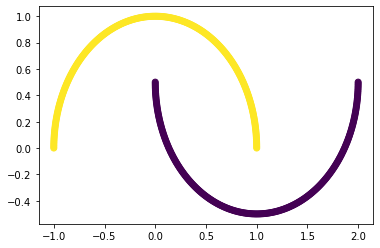

In [57]:
plt.scatter(X,Y,c=cluster_map)

# (c) What differences do you see between the DBSCAN and k-means methods, and why?

KMeans is much faster than DBScan algorithm. K-means Clustering is more efficient for large datasets, whereas DBSCan can not efficiently handle high dimensional datasets. DBScan doesn’t need number of clusters to be specified, while K-means need to specify the number of clusters hidden in the dataset. K-means Clustering does not work well with outliers and noisy datasets, but DBScan clustering efficiently handles them.

# (d) Operations on Dataset-2

In [64]:
dataset2 = pd.read_csv('D:\MTECH\Sem-1\Foundations of ML\dataset2.txt',header=None, sep=' ')

In [65]:
dataset2.head()

,0,1
0,9.359071,0.337273
1,-1.136104,4.229264
2,-1.818084,4.651985
3,-8.952252,5.983762
4,-6.636040,5.606801


In [66]:
pts2= dataset2.values
X_2 = dataset2[0]
Y_2= dataset2[1]

In [67]:
len(dataset2)

500

In [68]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(pts2)

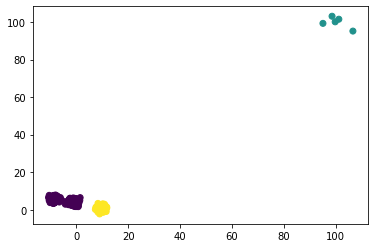

In [69]:
plt.scatter(X_2,Y_2, c=kmeans2.labels_.astype(float))

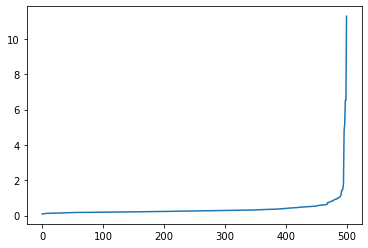

In [71]:
# Elbow Method 
y_distance=[]
for i in range(pts2.shape[0]):
    cal_distance=[]
    pointID = pts2[i]
    for j in range(pts2.shape[0]):
        dist = np.linalg.norm(pointID-pts2[j])
        if dist>0:
            cal_distance.append(dist)
    cal_distance.sort()
    k_dist = cal_distance[2] 
    y_distance.append(k_dist)
x_axis = [x for x in range(len(dataset2))]
y_axis = np.sort(y_distance)
plt.plot(x_axis,y_axis)

In [82]:
cluster_map=DBScan(pts2,1,20)

Clusters : 
Visited Node is :  0
Number of points in the Neighbourhood are :  72
Clusters : 
Visited Node is :  1
Number of points in the Neighbourhood are :  58
Clusters : 
Visited Node is :  3
Number of points in the Neighbourhood are :  53
Clusters : 
Visited Node is :  5
Number of points in the Neighbourhood are :  2
Clusters : 
Visited Node is :  57
Number of points in the Neighbourhood are :  3
Clusters : 
Visited Node is :  79
Number of points in the Neighbourhood are :  0
Clusters : 
Visited Node is :  82
Number of points in the Neighbourhood are :  2
Clusters : 
Visited Node is :  199
Number of points in the Neighbourhood are :  0
Clusters : 
Visited Node is :  246
Number of points in the Neighbourhood are :  4
Clusters : 
Visited Node is :  290
Number of points in the Neighbourhood are :  1
Clusters : 
Visited Node is :  295
Number of points in the Neighbourhood are :  0
Clusters : 
Visited Node is :  347
Number of points in the Neighbourhood are :  0
Clusters : 
Visited Node

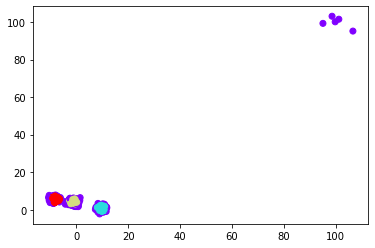

In [83]:
plt.scatter(X_2,Y_2,c=cluster_map,cmap='rainbow')

Advantages of K-Means :
1. It is easy to implement.
2. It can handle large datasets well.

Disadvantages of K-Means :
1. It does not work well with outliers.
2. K-means clustering is sensitive to the number of clusters specified.

Advantages of DBSCAN :
1. It can handle outliers easily.
2. It works well for noisy datasets.
3. Number of clusters need not be specified.

Disadvantages of DBSCAN :
1. DBSCan clustering can not efficiently handle high dimensional datasets.
2. It does not work very well for sparse datasets or datasets with varying density.
3. It is very sensitive to EPS and MinPts parameters.